In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
athletes = pd.read_excel(r'C:\Users\Asus\Desktop\datasets\tokyo olympics\Athletes.xlsx')
coaches = pd.read_excel(r'C:\Users\Asus\Desktop\datasets\tokyo olympics\Coaches.xlsx')
gender = pd.read_excel(r'C:\Users\Asus\Desktop\datasets\tokyo olympics\EntriesGender.xlsx')
medals = pd.read_excel(r'C:\Users\Asus\Desktop\datasets\tokyo olympics\Medals.xlsx')
teams = pd.read_excel(r'C:\Users\Asus\Desktop\datasets\tokyo olympics\Teams.xlsx')

C:\Users\Asus\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [150]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [151]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [152]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [153]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [154]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


# Analyzing Athletes dataset

In [155]:
athletes.shape

(11085, 3)

In [156]:
athletes.NOC.nunique()

206

206 countries have participated in the Olympic games.

<AxesSubplot:title={'center':'Countries Athletes Represent'}, xlabel='count', ylabel='NOC'>

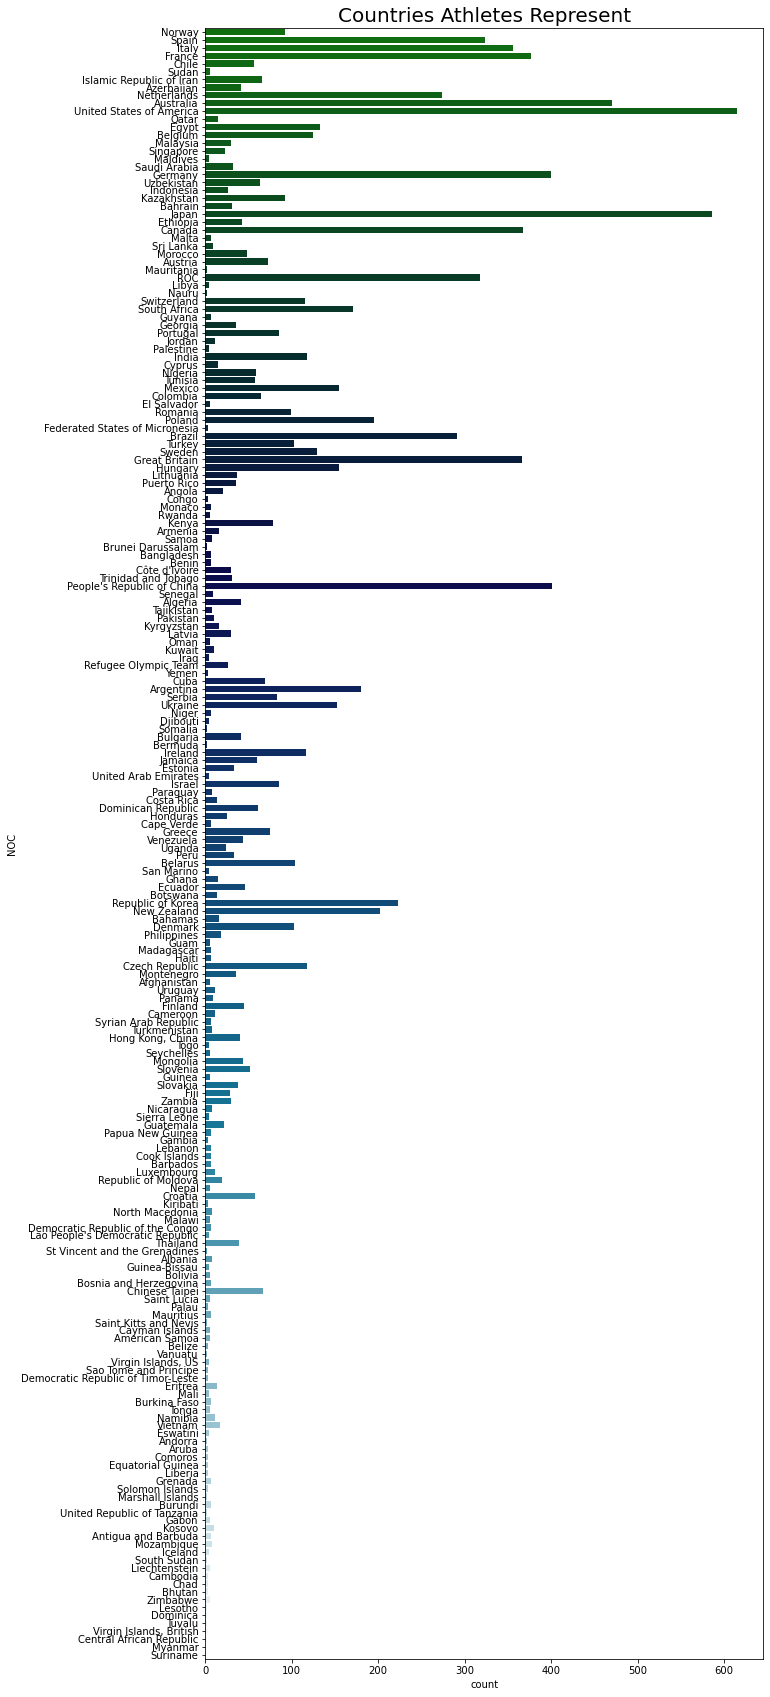

In [299]:
plt.figure(figsize = (10,30))
plt.title('Countries Athletes Represent', fontsize = 20)
sns.countplot(y = athletes['NOC'],palette = 'ocean')

We can infer that USA, followed by Japan has had the most number of athletes.

In [158]:
athletes.NOC.value_counts()

United States of America       615
Japan                          586
Australia                      470
People's Republic of China     401
Germany                        400
                              ... 
Tuvalu                           2
Mauritania                       2
Myanmar                          2
United Republic of Tanzania      2
Vanuatu                          2
Name: NOC, Length: 206, dtype: int64

In [159]:
athletes_sorted = athletes.groupby('NOC').count().reset_index()
athletes_sorted

,NOC,Name,Discipline
0,Afghanistan,5,5
1,Albania,8,8
2,Algeria,41,41
3,American Samoa,5,5
4,Andorra,2,2
...,...,...,...
201,"Virgin Islands, British",3,3
202,"Virgin Islands, US",4,4
203,Yemen,3,3
204,Zambia,29,29


In [160]:
athletes_sorted = athletes_sorted.sort_values('Discipline', ascending = False)
athletes_sorted.head(10)

,NOC,Name,Discipline
195,United States of America,615,615
94,Japan,586,586
10,Australia,470,470
144,People's Republic of China,401,401
71,Germany,400,400
67,France,377,377
33,Canada,368,368
73,Great Britain,366,366
92,Italy,356,356
174,Spain,324,324


In [161]:
top_countries = athletes_sorted.head(30)
top_countries

,NOC,Name,Discipline
195,United States of America,615,615
94,Japan,586,586
10,Australia,470,470
144,People's Republic of China,401,401
71,Germany,400,400
67,France,377,377
33,Canada,368,368
73,Great Britain,366,366
92,Italy,356,356
174,Spain,324,324


Text(0.5, 1.0, 'Top 30 countries representing athletes')

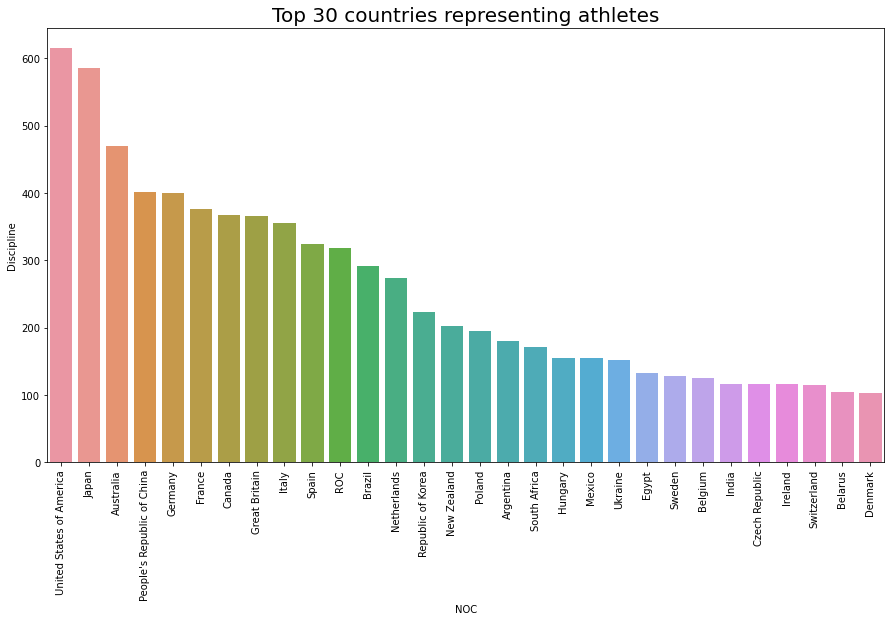

In [162]:
plt.figure(figsize = (15,8))
sns.barplot(x = top_countries['NOC'], y = top_countries['Discipline'])
plt.xticks(rotation = 90)

plt.title('Top 30 countries representing athletes', fontsize = 20)

In [163]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


Text(0.5, 1.0, 'Number of athletes per competitive event')

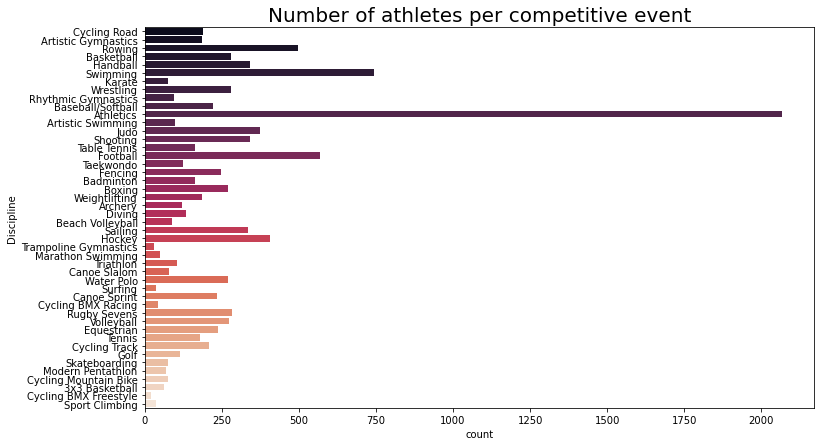

In [164]:
plt.figure(figsize = (12,7))
sns.countplot(y = athletes.Discipline, data = athletes, palette = 'rocket')
plt.title('Number of athletes per competitive event', fontsize = 20)

In [165]:
event_group = athletes.groupby('Discipline').count().reset_index()
event_group

,Discipline,Name,NOC
0,3x3 Basketball,62,62
1,Archery,122,122
2,Artistic Gymnastics,187,187
3,Artistic Swimming,98,98
4,Athletics,2068,2068
5,Badminton,164,164
6,Baseball/Softball,220,220
7,Basketball,280,280
8,Beach Volleyball,90,90
9,Boxing,270,270


In [166]:
top_events = event_group.sort_values('Name', ascending = False).head(10)
top_events

,Discipline,Name,NOC
4,Athletics,2068,2068
36,Swimming,743,743
20,Football,567,567
29,Rowing,496,496
23,Hockey,406,406
24,Judo,373,373
22,Handball,343,343
32,Shooting,342,342
31,Sailing,336,336
30,Rugby Sevens,283,283


Text(0.5, 1.0, 'Top 10 Competitive Events')

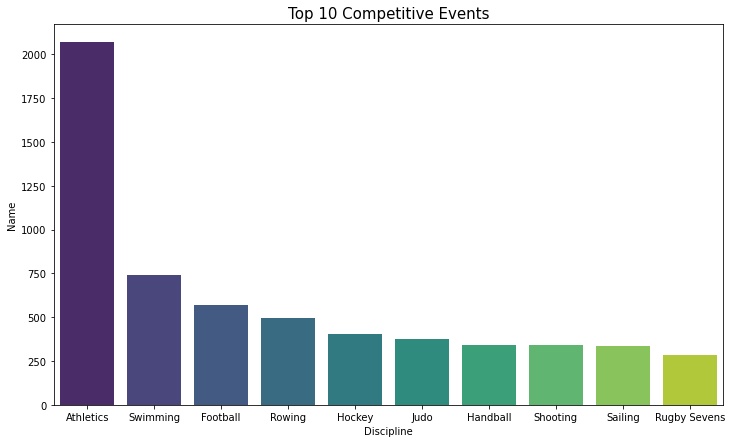

In [167]:
plt.figure(figsize = (12,7))
sns.barplot(y = top_events.Name, x = top_events.Discipline, data = top_events, palette = 'viridis')
plt.title('Top 10 Competitive Events', fontsize = 15)

# Analyzing Gender Dataset

In [168]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [169]:
gender.isnull().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

Text(0.5, 1.0, 'Gender Distribution across all events')

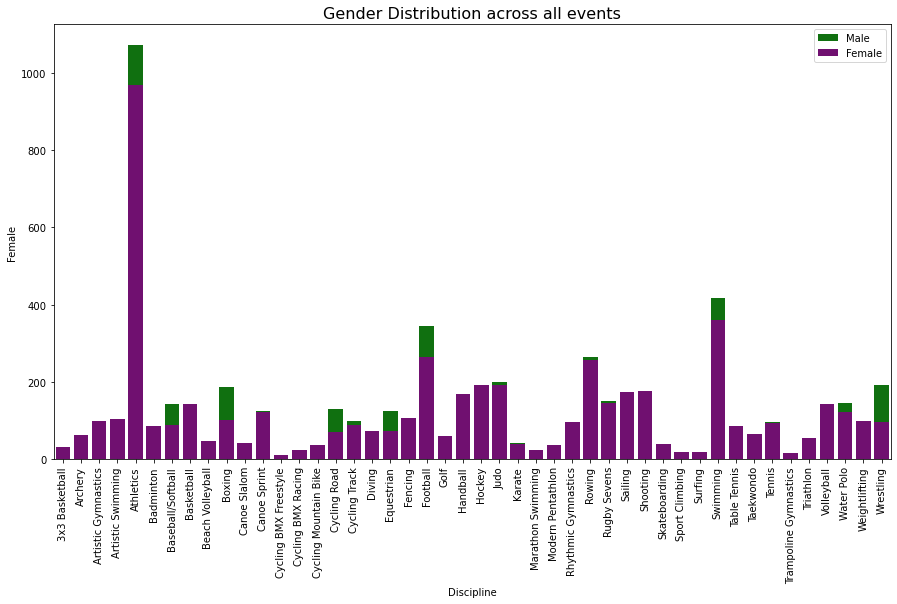

In [170]:
plt.figure(figsize = (15,8))
bar1 = sns.barplot(y = gender.Male, x = gender.Discipline, color = 'green', label = 'Male')
bar2 = sns.barplot(y = gender.Female, x = gender.Discipline, color = 'purple', label = 'Female')
plt.xticks(rotation = 90)
bar1.legend()
bar2.legend()
plt.title('Gender Distribution across all events', fontsize = 16)

Text(0.5, 1.0, 'Gender Distribution across Top 10 Events')

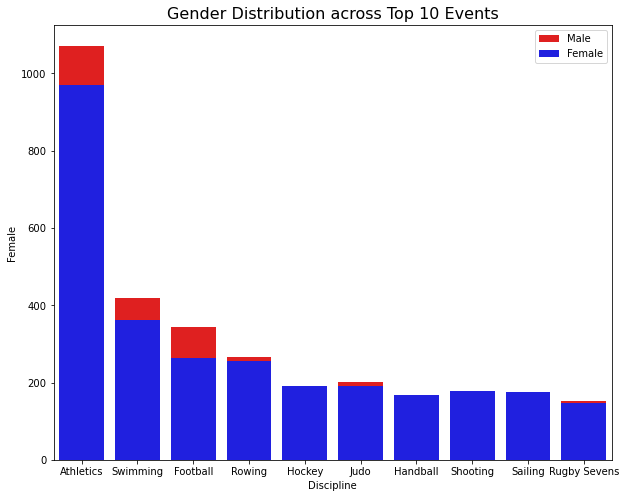

In [171]:
plt.figure(figsize = (10,8))
bar1 = sns.barplot(y = gender.Male, x = top_events.Discipline, color = '#ff0000', label = 'Male')
bar2 = sns.barplot(y = gender.Female, x = top_events.Discipline, color = 'blue', label = 'Female')
bar1.legend()
bar2.legend()
plt.title('Gender Distribution across Top 10 Events', fontsize = 16)

In [172]:
print("Total Number of Female Athletes:", gender['Female'].sum())
print("Total Number of Male Athletes:", gender['Male'].sum())

Total Number of Female Athletes: 5432
Total Number of Male Athletes: 5884


# Analysing Coaches Dataset

In [173]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [174]:
coaches.shape

(394, 4)

In [176]:
coaches.drop(columns = ['Event'], inplace = True)
coaches

,Name,NOC,Discipline
0,ABDELMAGID Wael,Egypt,Football
1,ABE Junya,Japan,Volleyball
2,ABE Katsuhiko,Japan,Basketball
3,ADAMA Cherif,Côte d'Ivoire,Football
4,AGEBA Yuya,Japan,Volleyball
...,...,...,...
389,ZAMORA PEDREIRA Javier,Spain,Basketball
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming
392,ZIJP Simon,Netherlands,Hockey


Text(0.5, 1.0, 'Coaches for each Discipline')

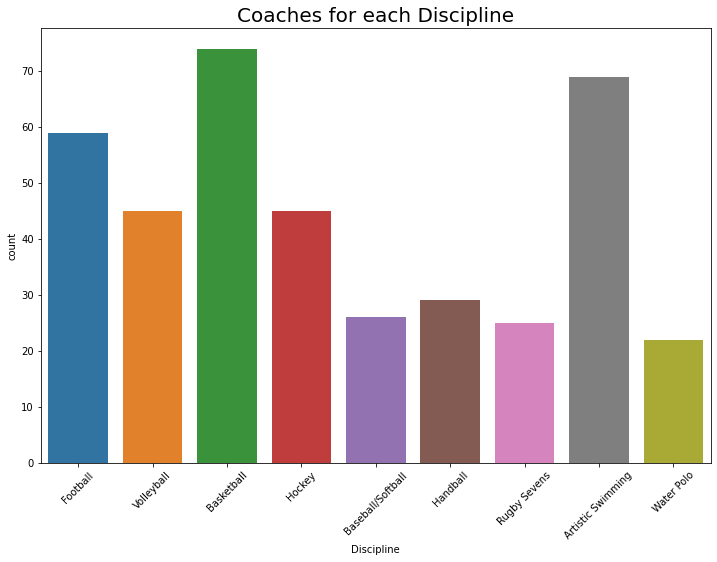

In [185]:
plt.figure(figsize = (12,8))
sns.countplot(x = coaches.Discipline)
plt.xticks(rotation = 45)
plt.title('Coaches for each Discipline', fontsize = 20)

# Analysing Teams Dataset

In [177]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


Text(0.5, 1.0, 'Team Disciplines')

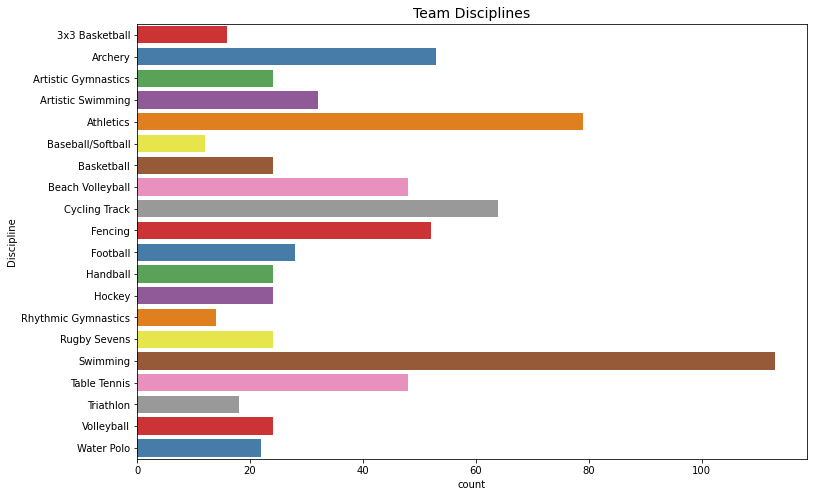

In [178]:
plt.figure(figsize = (12,8))
sns.countplot(y = teams.Discipline, palette = "Set1")
plt.title('Team Disciplines', fontsize = 14)

Text(0.5, 1.0, 'Team Disciplines versus Country')

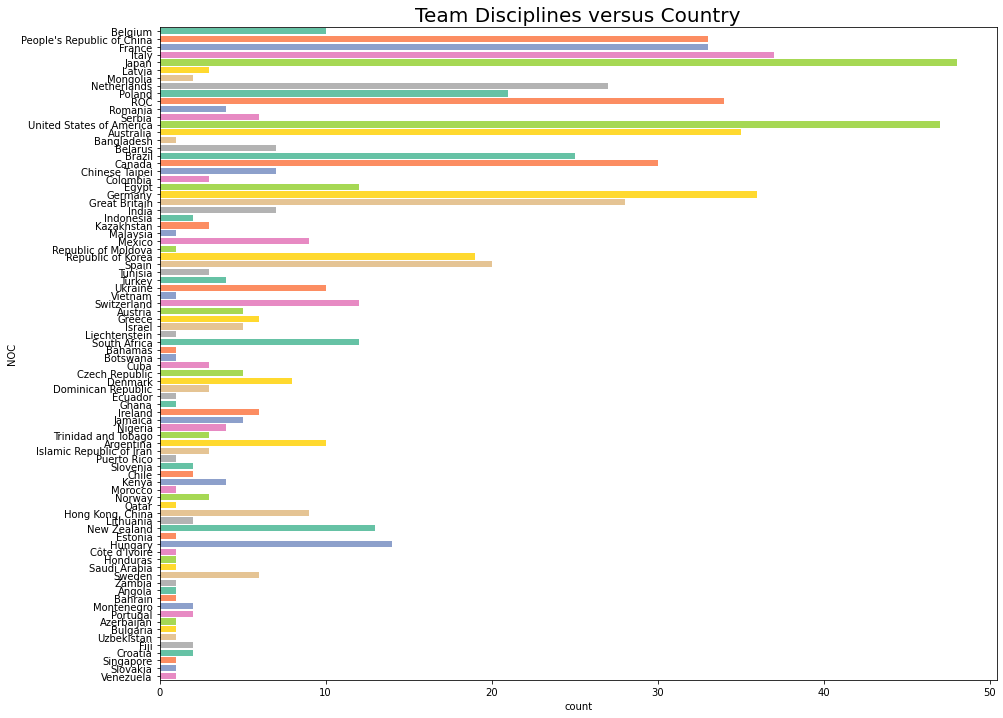

In [179]:
plt.figure(figsize = (15,12))
sns.countplot(y = teams.NOC, palette = "Set2", saturation = 3)
plt.title('Team Disciplines versus Country', fontsize = 20)

# Analysing Medals Dataset

In [186]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [187]:
medals.sort_values('Rank by Total')

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
...,...,...,...,...,...,...,...
76,77,Bahrain,0,1,0,1,77
62,63,Bermuda,1,0,0,1,77
63,63,Morocco,1,0,0,1,77
81,77,Turkmenistan,0,1,0,1,77


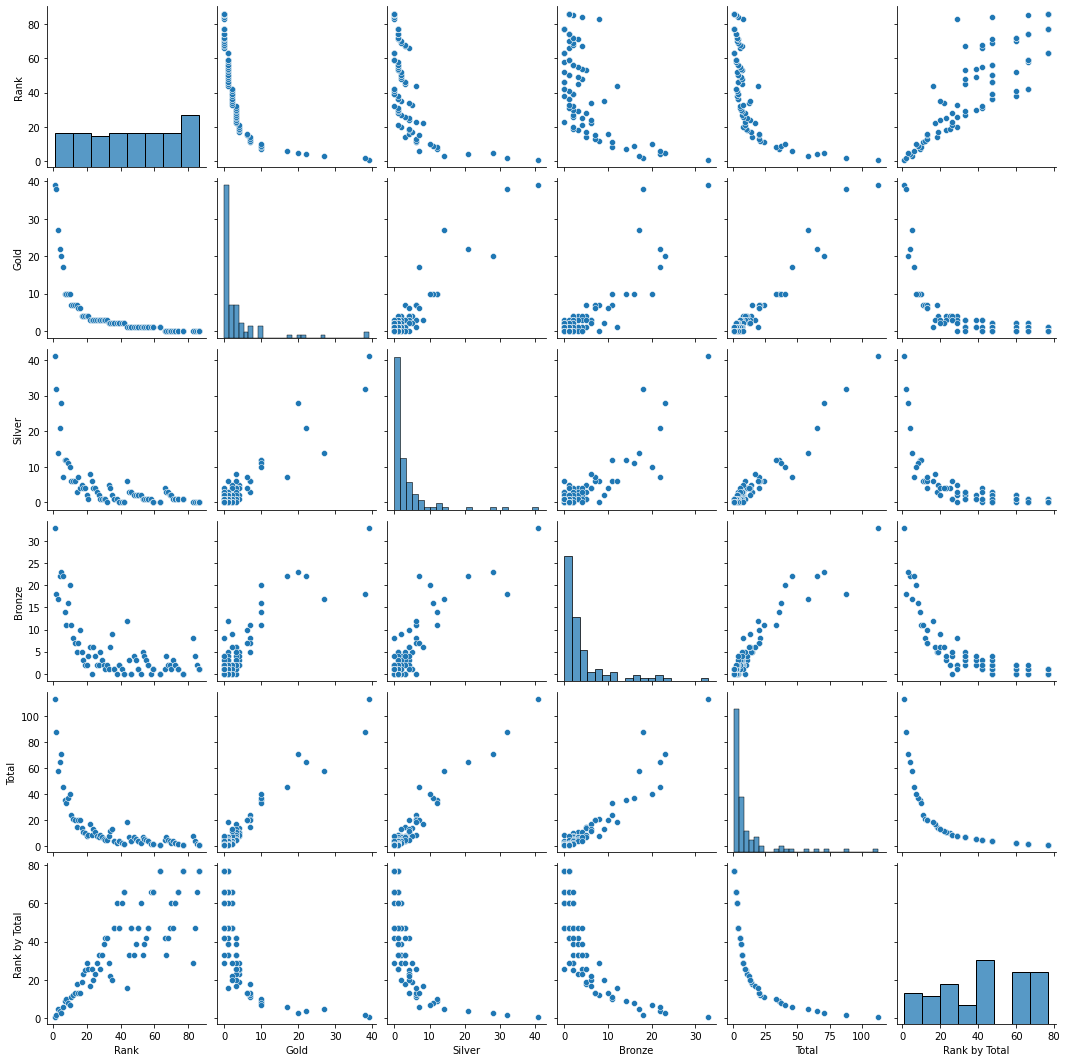

In [242]:
sns.pairplot(medals)

Text(0.5, 1.0, 'Bar Plot(Total Medals per Nation) for Top 20 Ranked Countries')

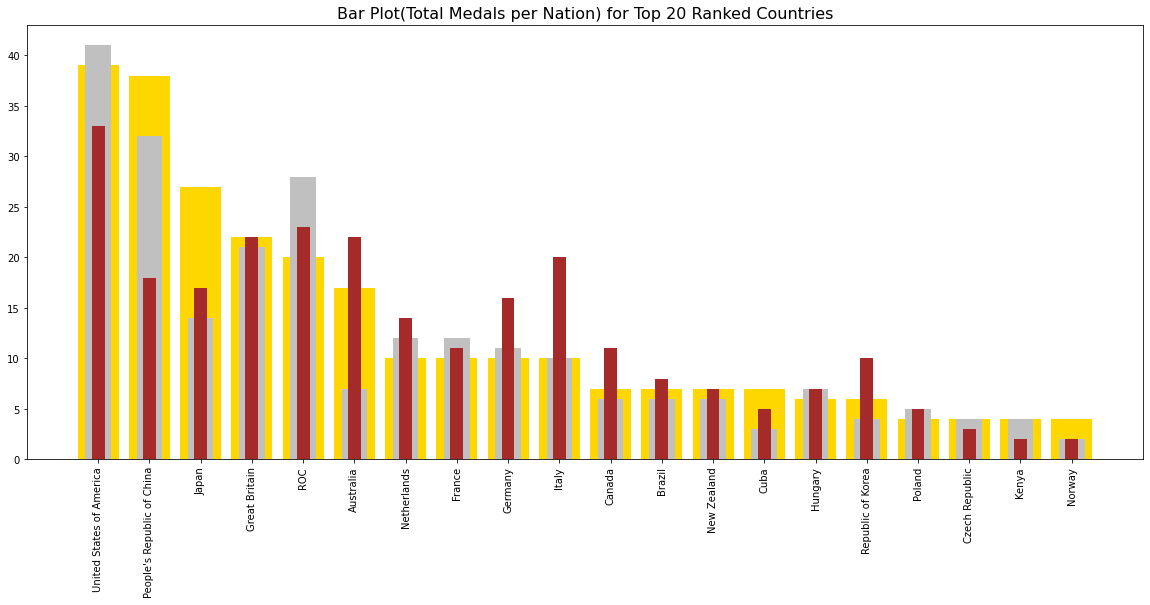

In [265]:
top_20_medals = medals[:20]
plt.figure(figsize = (20,8))

plt.bar(top_20_medals['Team/NOC'],top_20_medals.Gold , color = 'gold')
plt.bar(top_20_medals['Team/NOC'],top_20_medals.Silver, color = 'silver', width = 0.5)
plt.bar(top_20_medals['Team/NOC'],top_20_medals.Bronze, color = 'brown', width = 0.25 )

plt.xticks(rotation = 90)

plt.title('Bar Plot(Total Medals per Nation) for Top 20 Ranked Countries', fontsize = 16)

Text(0.5, 1.0, 'Gold medals for Top 20 Ranking Countries')

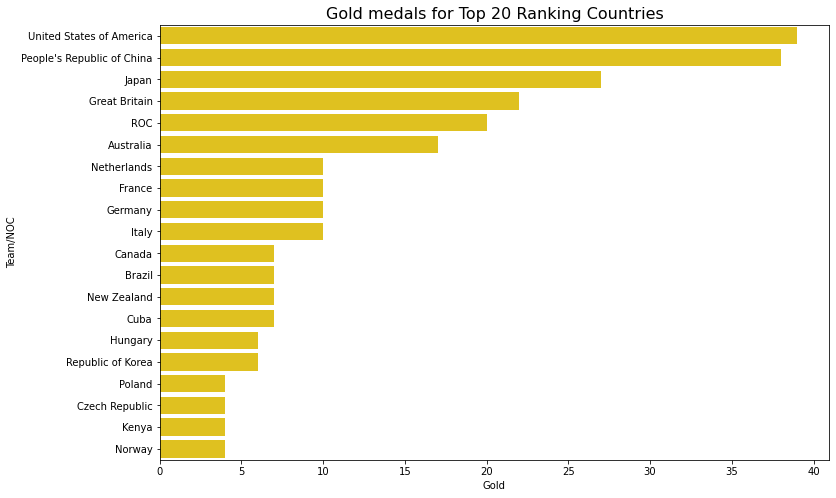

In [209]:
top_20_medals = medals[:20]
plt.figure(figsize = (12,8))
sns.barplot(x = top_20_medals.Gold, y =top_20_medals['Team/NOC'], color = 'gold')
plt.title('Gold medals for Top 20 Ranking Countries', fontsize = 16)

Text(0.5, 1.0, 'Silver medals for Top 20 Ranking Countries')

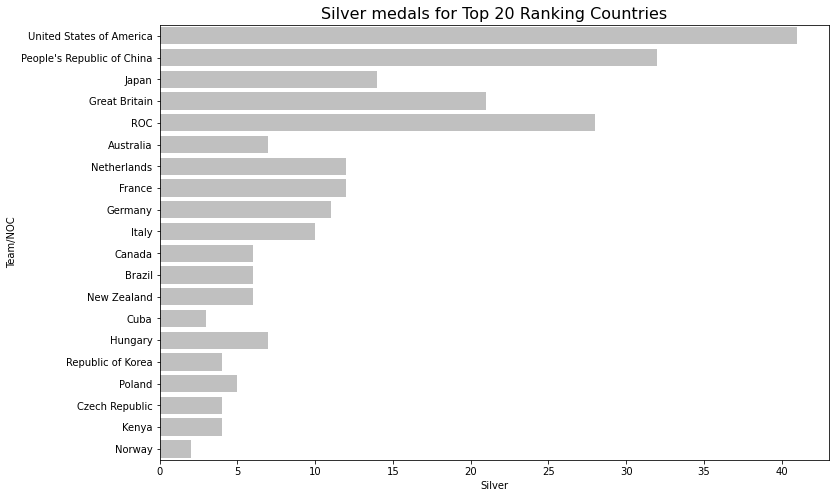

In [208]:
top_20_medals = medals[:20]
plt.figure(figsize = (12,8))
sns.barplot(x = top_20_medals.Silver, y =top_20_medals['Team/NOC'], color = 'silver')
plt.title('Silver medals for Top 20 Ranking Countries', fontsize = 16)

Text(0.5, 1.0, 'Bronze medals for Top 20 Ranking Countries')

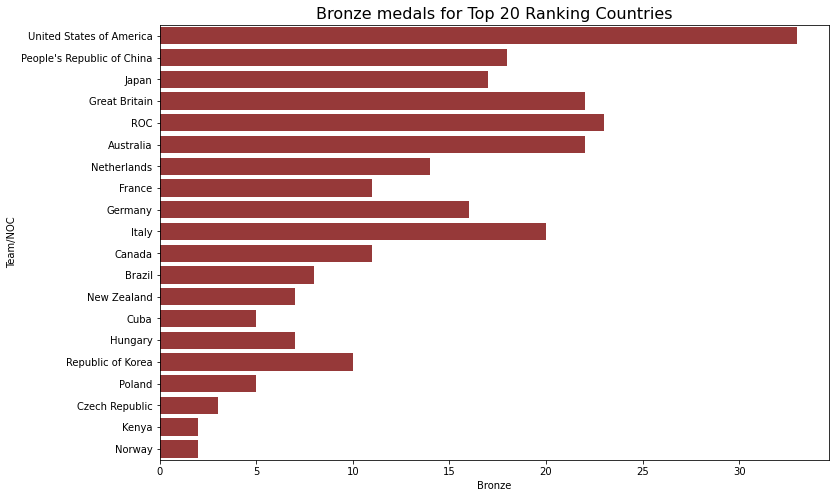

In [237]:
top_20_medals = medals[:20]
plt.figure(figsize = (12,8))
sns.barplot(x = top_20_medals.Bronze, y =top_20_medals['Team/NOC'], color = 'brown')
plt.title('Bronze medals for Top 20 Ranking Countries', fontsize = 16)

Text(0.5, 1.0, 'Percentage Distribution of Medals for Top 20 Nations')

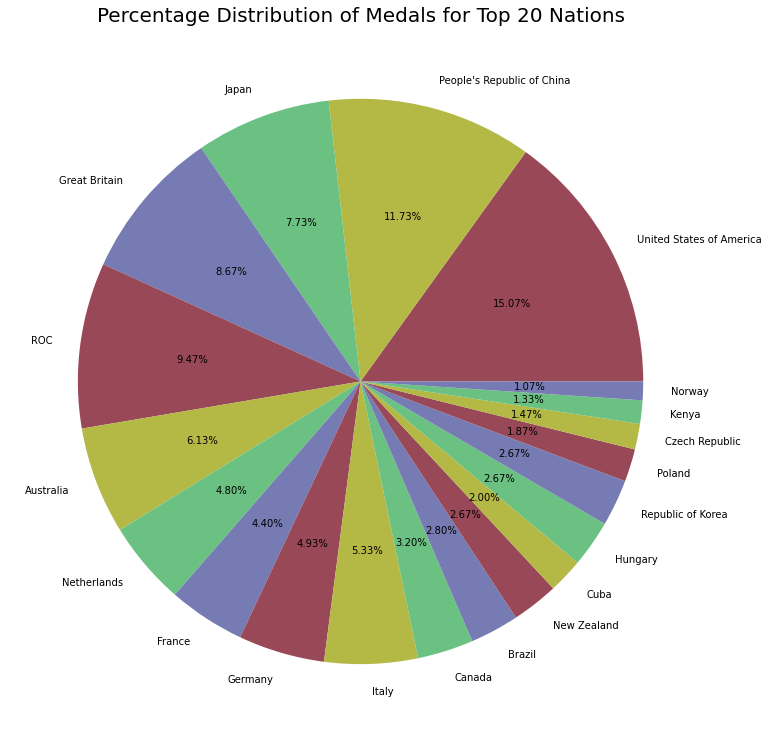

In [257]:
top_20_countries = medals['Team/NOC'][:20]
top_20_total = medals['Total'][:20]

color = ['#994857', '#B4B945', '#6BC182', '#767BB3']
plt.figure(figsize = (16,13))
plt.pie(top_20_total, labels = top_20_countries, autopct = '%1.2f%%', colors = color)
plt.title('Percentage Distribution of Medals for Top 20 Nations', fontsize = 20)

Text(0.5, 1.0, 'Silver medals for Top 50 Countries')

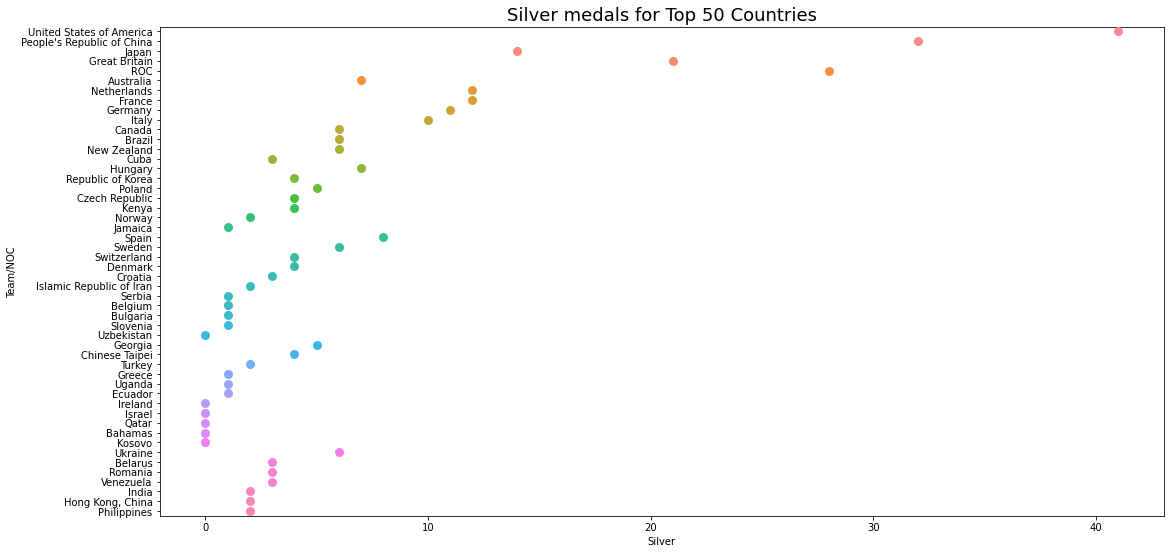

In [296]:
plt.figure(figsize = (18,9))
sns.swarmplot(data = medals[:50], x = 'Silver', y = 'Team/NOC', size = 9)
plt.title('Silver medals for Top 50 Countries', fontsize = 18)

Text(0.5, 1.0, 'Gold medals for Top 50 Countries')

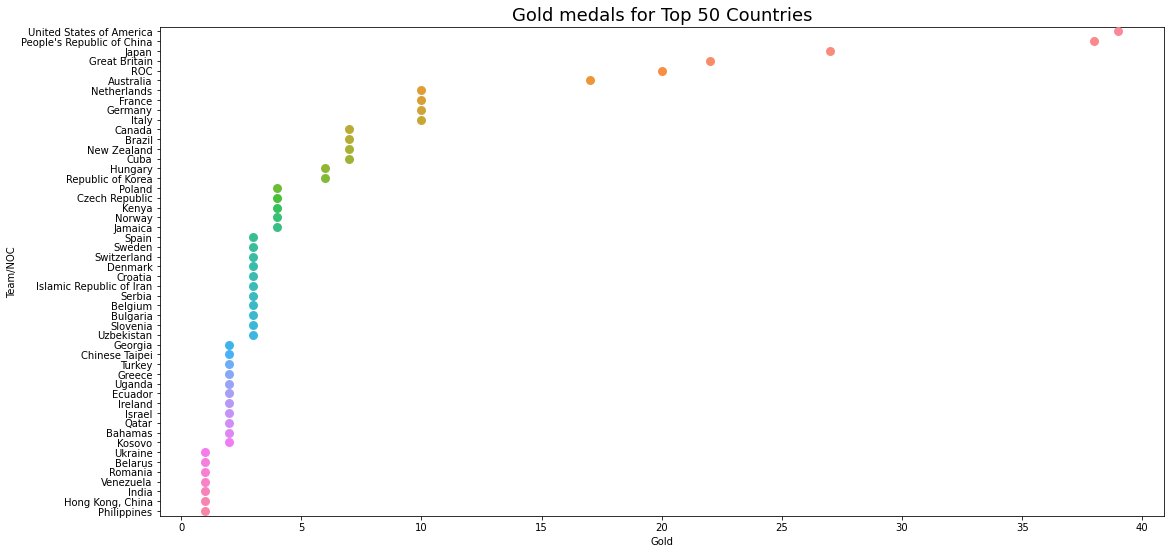

In [298]:
plt.figure(figsize = (18,9))
sns.swarmplot(data = medals[:50], x = 'Gold', y = 'Team/NOC', size = 9)
plt.title('Gold medals for Top 50 Countries', fontsize = 18)

Text(0.5, 1.0, 'Bronze medals for Top 50 Countries')

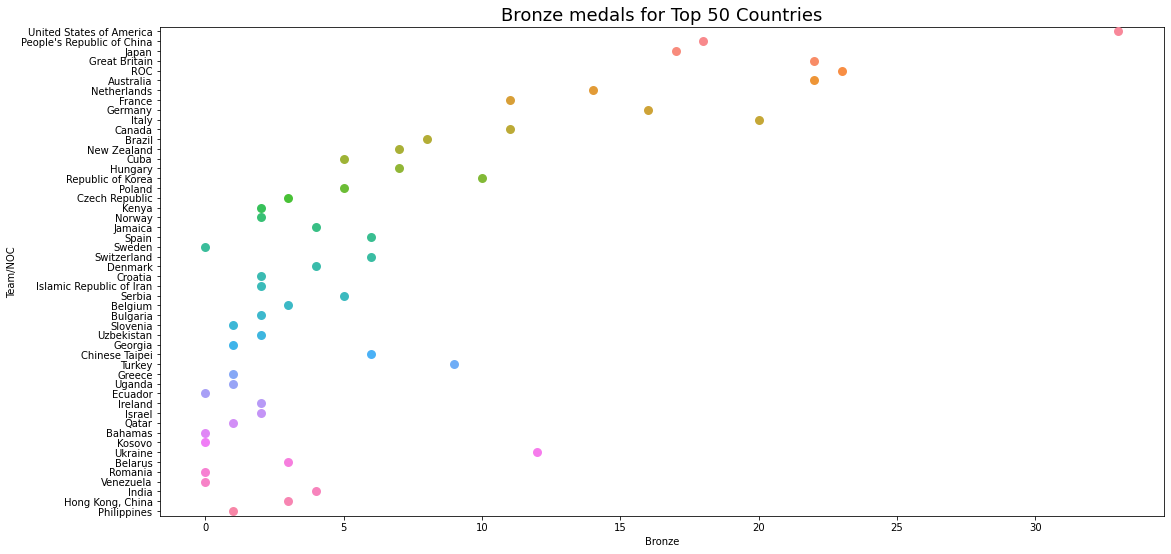

In [297]:
plt.figure(figsize = (18,9))
sns.swarmplot(data = medals[:50], x = 'Bronze', y = 'Team/NOC', size = 9)
plt.title('Bronze medals for Top 50 Countries', fontsize = 18)